<a href="https://colab.research.google.com/github/swachchhand/swachchhand/blob/main/ML_using__CIFAR_10_SWAT_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:36<00:00, 19.8MB/s]
100% 715M/715M [00:36<00:00, 20.6MB/s]


**ls** it's a "**LINUX COMMAND**"used to print the file of program that you've in the current directory

In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('New dataset extracted')

New dataset extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [8]:
### To extract the audio 'train.7z' file we'll need to install another extractor!!!!!
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.3 MB/s eta 0:00:00


In [10]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z')
archive.extractall(path='/content/Training set new file')
archive.close()

In [11]:
!ls

 cifar-10.zip   sample_data	       test.7z	 'Training set new file'
 kaggle.json    sampleSubmission.csv   train.7z   trainLabels.csv


**THE MAIN PROCESS OF CREATNG THE DATA AND NEURAL NETWORK STARTS FROM HERE**

In [12]:
from IPython.core.display import Image
######LET'S IMPORT ALL THE LIBRARIES
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [13]:
filenames = os.listdir('/content/Training set new file/train')
type(filenames)
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])


['34458.png', '1436.png', '48328.png', '905.png', '12403.png']
['336.png', '49260.png', '3837.png', '21524.png', '24224.png']


LET'S RPOCESS LABELS IN A FORM OF ARRAY!!!!

In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id'] == 9979]  ######to verify the image label from id

,id,label
9978,9979,frog


In [18]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


let's put the images in order!

In [20]:
#####FOR LOOP
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
labels_dictionary = {'airplane':0,'dog':1,'cat':2,'ship':3,'horse':4,'bird':5,'automobile':6,'deer':7,'truck':8,'frog':9}

####creating list
labels = [labels_dictionary[i] for i in labels_df['label']]

In [22]:
print(labels[0:5])
print(labels[-5:])

[9, 8, 8, 7, 6]
[5, 9, 8, 6, 6]


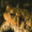

In [23]:
##### to read an image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Training set new file/train/9979.png')
cv2_imshow(img)

In [24]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [25]:
list_id = list(labels_df['id'])
print(list_id[0:5])
print(list_id[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**we'll use a for loop to process the image (above array) and assign every value in this array to a png format to convert it into an image and return the output!!!!!!**

In [26]:
#####IMAGE PROCESSING

#train_data_folder = '/content/Training set new file/train/'

######### we'll take the list and convert it all into a numpy array and then assign it to png format!!!
#data = []

#for id in list_id:

  #### the way the concatination works is;
  # img_path = train_data_folder + str(id) +'.png'
  # print(img_path)

  # if id >= 5:
  #  break


train_data_folder = '/content/Training set new file/train/'
data = []

for id in list_id:
  image = Image.open(train_data_folder + str(id) + '.png')    #####using the pillow library as PIL we've defined an object
  image = np.array(image)     #### here we've converted it into a numpy array
  data.append(image)      #####and the empty data list (in line 19) created above will start storing the append values as/in image.png format!

type(data)    ###we know it's a list

print("the length of the data will be: ", len(data))

the length of the data will be:  50000


In [27]:
##### what is the type of the first element in the list'
print(type(data[0]))    #### to verify the shape of array, i.e., is it a numpy
data[0].shape   ### the dimensions of image

<class 'numpy.ndarray'>


(32, 32, 3)

In [28]:
print(data[0])  # when 0 --> 0 and for 255--> 1  (Binary Classification)
#### here the dimension of all were 32 x 32 but if not then resize all of them to a specific format!!!

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [29]:
#convert images and labels list to numpy arrays

x = np.array(data)
y = np.array(labels)
####### just changing the data types

print(type(x))
print(x.shape)
print(y.shape)   #labels

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000,)


We'll train test the data

In [30]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
#### The "TTS functn."will splits arrays or matrices into random subsets for train and test data and the random split aims to shuffle the data set and get new values to train the model.


print(x.shape, x_train.shape, x_test.shape)


(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


**NORMALISATION**

In [31]:
####  Scaling down or NORMALISATION

x_train_normalised = x_train/255
x_test_normalised = x_test/255

print(x_train_normalised)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

In [32]:
print(x_train)

[[[[209 210 203]
   [213 214 209]
   [218 219 215]
   ...
   [127  74  39]
   [122  68  35]
   [116  63  32]]

  [[210 210 202]
   [213 214 207]
   [218 220 214]
   ...
   [124  70  35]
   [121  67  33]
   [123  69  36]]

  [[206 205 195]
   [209 209 202]
   [213 215 209]
   ...
   [124  70  37]
   [131  77  42]
   [131  78  41]]

  ...

  [[127 108  97]
   [138 122 110]
   [141 127 118]
   ...
   [158 149 134]
   [161 156 151]
   [136 137 148]]

  [[145 130 119]
   [148 135 128]
   [136 127 128]
   ...
   [175 174 172]
   [160 161 170]
   [143 148 164]]

  [[138 128 123]
   [140 132 136]
   [136 131 140]
   ...
   [150 154 169]
   [145 149 166]
   [140 145 163]]]


 [[[187 207 240]
   [186 205 237]
   [188 207 240]
   ...
   [165 201 236]
   [163 198 235]
   [163 199 236]]

  [[193 212 243]
   [192 210 241]
   [194 212 243]
   ...
   [169 204 238]
   [167 202 238]
   [167 202 238]]

  [[198 214 244]
   [196 212 241]
   [198 214 243]
   ...
   [172 205 238]
   [170 203 236]
   [170 204

**BUILDING THE NEURAL NETWORK**

In [33]:
import tensorflow as tf   ### tensorflow is developed by google and pytorch by facebook
from tensorflow import keras

noc = 10 ### noc and easy varible for no. of classes which in this case we know is/are ten(10)

##### the layers of the neural network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),   # input layer ; 3 channels i.e., RGB  ; Flatten: Single dimension vector or coloumn of values!!!
    keras.layers.Dense(64, activation='relu'),   ### one hidden layer with 64 neurons (64: values usually are taken in power of two cuz of computational efficiency)
    keras.layers.Dense(noc, activation='softmax')  ##### output layers with 10 neurons and softmax activation functn. for treating more than two classes(i.e. 10).
])

print(model)


In [34]:
#### Compile the neural neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #### This is a loss function used for multi-class classification problem (provides difference between true and predicted probability distribution)
              metrics=['acc'])

In [38]:
## Training the neural network

model.fit(x_train_normalised,y_train,validation_split=0.1,epochs=10)

# model tries to find labels and the images
# the validation split is test data...
# One Epoch is bascially one forward and one backward propogation : that is the whole model will go through training and each timeit undergoes training the weights get updated through which our accuracy improves.

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9329 - acc: 0.2537 - val_loss: 1.9273 - val_acc: 0.2420
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9314 - acc: 0.2521 - val_loss: 1.9198 - val_acc: 0.2528
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9276 - acc: 0.2539 - val_loss: 1.9092 - val_acc: 0.2570
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9244 - acc: 0.2540 - val_loss: 1.9209 - val_acc: 0.2537
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9221 - acc: 0.2561 - val_loss: 1.9064 - val_acc: 0.2580
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9200 - acc: 0.2571 - val_loss: 1.9242 - val_acc: 0.2510
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9187 - acc: 0.2569 - val_loss: 1.9543 - val_acc: 0.2407
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

# **USING CIFAR-10.0 TO TRAIN *'ResNets-50'* and Improve Accuracy!!**

In [39]:
from tensorflow.keras import Sequential, models, layers   #### we're going to stack all the above layers togethers using sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50   #### Actual model to be used
from tensorflow.keras import optimizers

In [40]:
CNN_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
#### imagenet is an image data(contains millions of images and thousands of classes, around 40 million pieces of data)
#### include_false will drop the resnet's output layer and import our own custom output layer with 10 weights as shown before!

print(CNN_base.summary())

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [41]:
#### Let's add some layers

noc = 10

model = models.Sequential()

## we'll upscale the data to 256 x 256 format

model.add(layers.UpSampling2D((2,2)))   ## 64 x 64
model.add(layers.UpSampling2D((2,2)))   ## 128 x 128
model.add(layers.UpSampling2D((2,2)))   ## 256 x 256

## After upscaling we'll proceed further

model.add(CNN_base)   ## contain all the layers
model.add(layers.Flatten())   ## convert the matrix into vector, i.e., a single coloumn
model.add(layers.BatchNormalization())  ## all values of same range i.e., normalized at the end of each layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))   ### Overfit data: High training accuracy but very low testing accuracy; droput is turning off a few nuerons to prevent the model from overfitting!!
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(noc, activation='softmax'))  ## output layer

In [42]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
history = model.fit(x_train_normalised,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1125/1125 [==============================] - 467s 380ms/step - loss: 2.1567 - acc: 0.2170 - val_loss: 1.6761 - val_acc: 0.3823
Epoch 2/5
1125/1125 [==============================] - 437s 389ms/step - loss: 1.5954 - acc: 0.4148 - val_loss: 1.3456 - val_acc: 0.5045
Epoch 3/5
1125/1125 [==============================] - 438s 390ms/step - loss: 1.3272 - acc: 0.5360 - val_loss: 1.2314 - val_acc: 0.5602
Epoch 4/5
1125/1125 [==============================] - 439s 390ms/step - loss: 1.1439 - acc: 0.6055 - val_loss: 1.2167 - val_acc: 0.5845
Epoch 5/5
1125/1125 [==============================] - 438s 390ms/step - loss: 1.0251 - acc: 0.6494 - val_loss: 0.8458 - val_acc: 0.7075


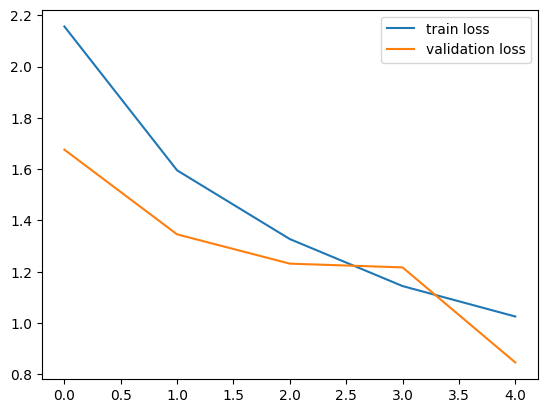

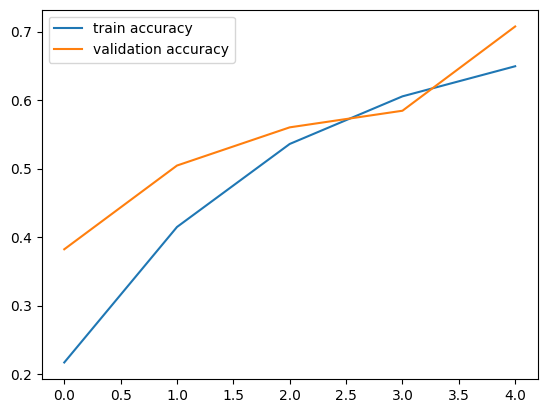

In [48]:
H = history

## Let's plot the loss value
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## Let's plot the accuracy value
plt.plot(H.history['acc'], label='train accuracy')
plt.plot(H.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [49]:
loss, accuracy =model.evaluate(x_test_normalised, y_test)
print("Test Accuracy Obtained = ", accuracy)

313/313 [==============================] - 40s 117ms/step - loss: 0.8732 - acc: 0.6989
Test Accuracy Obtained =  0.6988999843597412
